# 第七课 - 数据可视化

本课内容：
* matplotlib 绘图基础
    * 函数曲线的绘制
    * 图形细节的设置
* 案例分析：销售记录可视化
    * 条形图
    * 绘制多图
    * 饼图
    * 散点图
    * 直方图
* seaborn 数据可视化包
    * 分类数据的散点图
    * 分类数据的箱线图
    * 多变量图

#### 回顾：在之前课程中， 我们已经接触到了数据可视化
* 在第五节课中，我们通过pandas的plot函数对莺尾花数据进行了可视化。我们绘制了根据品种分类的散点图和箱线图。
* 在第六节课中，我们使用matplotlib绘制了姓名变化趋势图，并通过plt的各种选项对图形进行了美化。


上述例子中可视化都是基于matplotlib来展开的，在本次课程中我们将详细演示如何使用matplotlib
* matplotlib 是Python编程语言的一个绘图库，最初由John D. Hunter撰写。
* 与Python的深度集成
* 风格与Matlab接近

![](plots.jpg)

## matplotlib 绘图基础

In [2]:
# 导入Matplotlib做图工具
import matplotlib.pyplot as plt 
# 导入numpy和pandas包
import numpy as np
import pandas as pd

# 设置在notebook中直接展示图形输出
%matplotlib inline  
# 设置图片清晰度
%config InlineBackend.figure_format = 'retina'  

**例1：绘制正弦函数曲线**

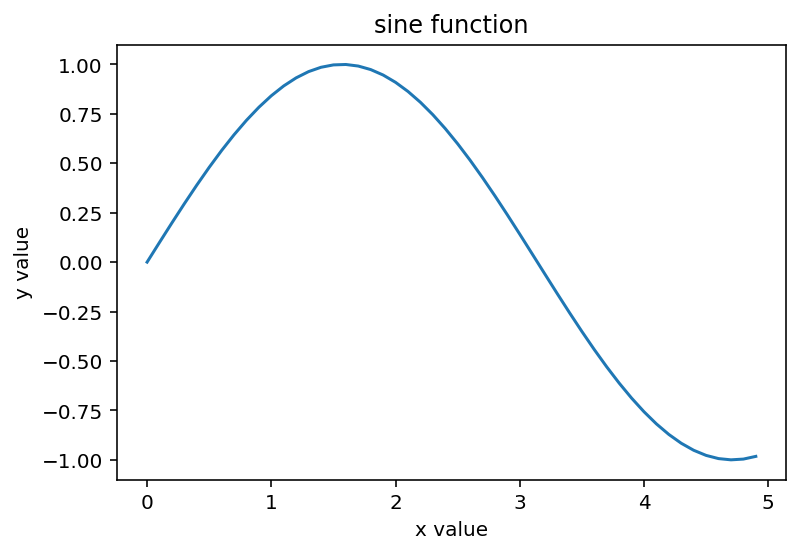

In [2]:
# 设置横坐标x的取值范围
x = np.arange(0, 5, 0.1);
# 根据x的值，通过sin()函数，获取y的值
y = np.sin(x)
# 使用matplotlib中的plot绘图函数
plt.plot(x, y)  
# 添加标题、x轴和y轴的名称
plt.title("sine function") # 标题
plt.xlabel("x value") # x坐标
plt.ylabel("y value") # y坐标
# 显示图像
plt.show()

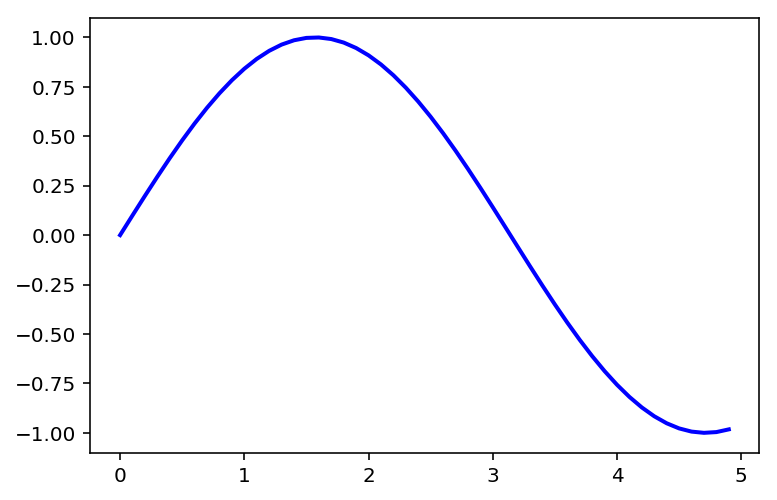

In [3]:
# 我们可以控制图形的每一个细节
# "b"代表blue，指定蓝色，"-"指定线的种类
# linewidth指定线的粗细
plt.plot(x, y, "b-", linewidth=2.0) 

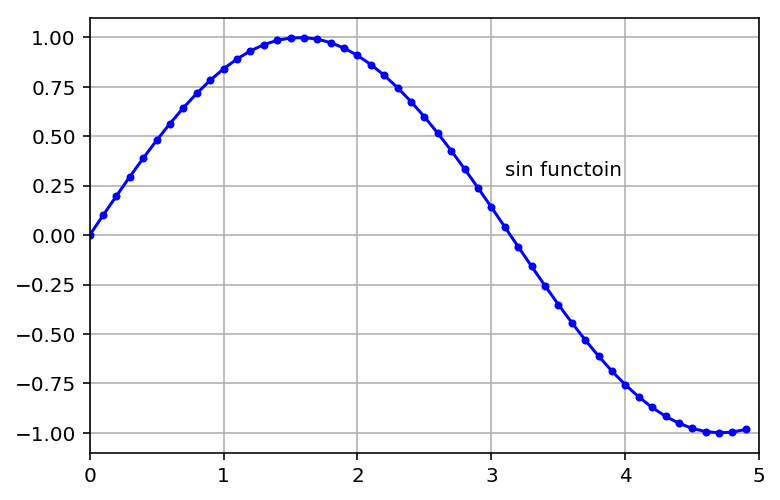

In [4]:
# 我们可以加上更多的常用选项
# marker加上书记点标记 选项包括 [ '+' | ',' | '.' | '1' | '2' | '3' | '4' ]
plt.plot(x,y, color = "blue", marker = ".")
# 设定x轴和y轴区间，等价于plt.xlim(0,5) 加上 plt.ylim(-1.1, 1.1)
plt.axis([0, 5, -1.1, 1.1]) 
# 加上网格
plt.grid(True)
# 加上文字描述
plt.text(3.1, 0.3, 'sin functoin')


**例2：绘制 $y=x, y=x^2, y=x^3$ 三个函数的曲线**

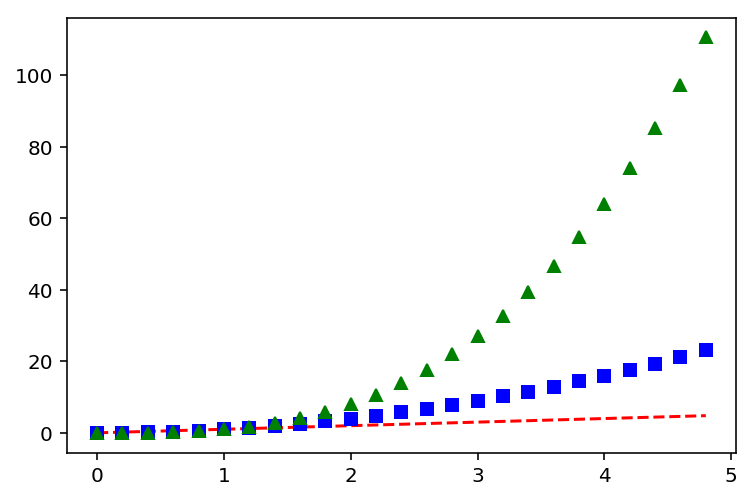

In [3]:
# 下面这个例子展示了，不同选项对图形产生的不同效果
t = np.arange(0., 5., 0.2)dzb

# 在[0,5]的区间上分别绘制了 y=x, y=x^2, 和y=x^3 
# "r"表示red红色，“--”表示虚线，
# “b”表示blue蓝色，“s”表示square正方形，
# “g”表示green绿色，“^”表示三角形
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')

### 小结
* 上述代码展示了matplotlib的一些基本功能，我们可以通过使用plt自带的各种函数来控制图形的细节，比如是否加网格，坐标的标签等等。
* 我们在后续课程中还会向大家展示其他常用图形

## 案例分析：销售记录可视化


### 导入并观察数据

In [6]:
# 读取excel数据文件
df = pd.read_excel("sample-salesv3.xlsx")  
df.head()

,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2014-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2014-01-01 10:00:47
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2014-01-01 13:24:58
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2014-01-01 15:05:22
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2014-01-01 23:26:55


* account number: 账号
* name: 公司名字，与账号有一一对应关系
* sku: 商品货号
* quantity: 购货量
* unit price: 单位价格
* ext price: 总价 = 购货量\*单位价格
* date: 日期
* 这组数据记录了某公司2014年的交易情况



In [7]:
# 查看数据总体信息
# 总共1500行数据
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
account number    1500 non-null int64
name              1500 non-null object
sku               1500 non-null object
quantity          1500 non-null int64
unit price        1500 non-null float64
ext price         1500 non-null float64
date              1500 non-null object
dtypes: float64(2), int64(2), object(3)
memory usage: 82.1+ KB


In [8]:
# 查看与之交易的公司数量， 共20个公司
len(df.name.unique())

20

In [9]:
# 以Barton LLC这个公司为例子，该公司在2014年一共有82笔交易。
df[df.name == "Barton LLC"]

,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2014-01-01 07:21:51
85,740150,Barton LLC,B1-50809,8,19.60,156.80,2014-01-20 01:48:47
91,740150,Barton LLC,B1-53102,1,68.06,68.06,2014-01-20 13:27:52
96,740150,Barton LLC,S2-16558,2,90.91,181.82,2014-01-21 21:21:01
99,740150,Barton LLC,B1-86481,20,30.41,608.20,2014-01-22 16:33:51
105,740150,Barton LLC,S1-06532,10,65.87,658.70,2014-01-24 00:00:35
117,740150,Barton LLC,S1-47412,27,36.12,975.24,2014-01-27 05:48:37
125,740150,Barton LLC,B1-33364,6,24.64,147.84,2014-01-28 16:28:29
158,740150,Barton LLC,S1-93683,21,10.34,217.14,2014-02-07 08:34:50
182,740150,Barton LLC,S2-10342,47,96.68,4543.96,2014-02-12 03:36:52


### ** 销售额最高的10个公司**

In [10]:
# groupby分组，并使用agg进行聚合运算，sum求交易总额，count计算交易次数
# reset_index 重置索引，在这里取消了name作为索引
# sort_values 进行排序，参数by设置按哪一列进行排序，ascending=False 表示按降序排列
top10 = df.groupby('name')['ext price'].agg(['sum', 'count']).reset_index().sort_values(by='sum', ascending=False)[:10]

# 使用rename对变量重新命名 
top10.rename(columns={'name': 'Name', 'sum': 'Sales', 'count': 'Purchases'}, inplace=True)

top1azdSx0

,Name,Sales,Purchases
12,Kulas Inc,137351.96,94
18,White-Trantow,135841.99,86
17,Trantow-Barrows,123381.38,94
6,Jerde-Hilpert,112591.43,89
3,"Fritsch, Russel and Anderson",112214.71,81
0,Barton LLC,109438.50,82
19,Will LLC,104437.60,74
10,Koepp Ltd,103660.54,82
2,"Frami, Hills and Schmidt",103569.59,72
8,Keeling LLC,100934.30,74


**条形图**

top10公司销售总额的条形图

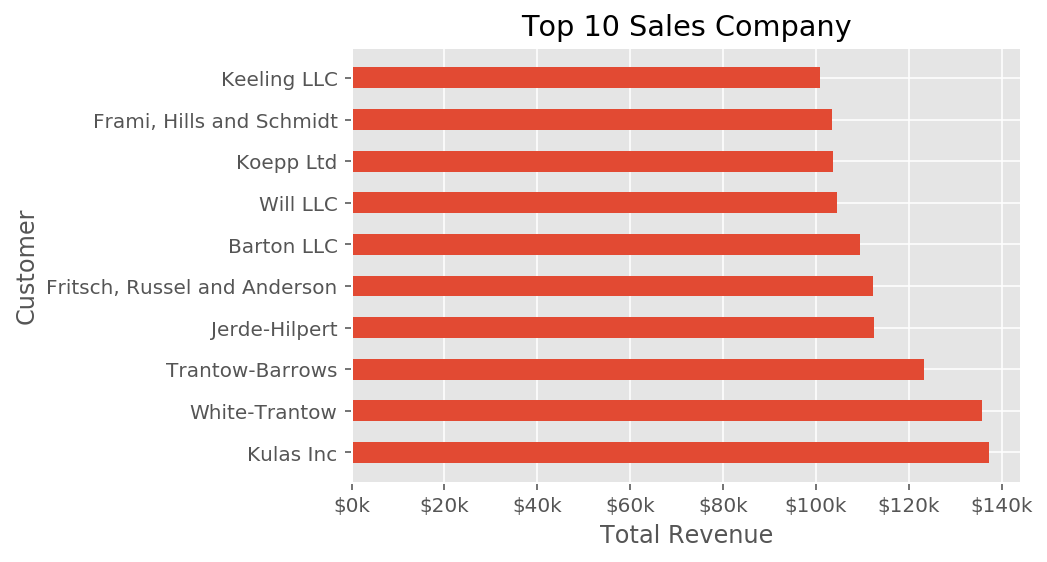

In [11]:
# 使用ggplot风格的作图
plt.style.use('ggplot')

# barh绘制水平方向的条形图， bar绘制垂直的直方图
plt.barh(np.arange(10), top10.Sales, height=0.5)

# 添加标题
plt.title('Top 10 Sales Company')
plt.xlabel('Total Revenue')
plt.ylabel('Customer')

# 修改纵坐标和横坐标的刻度
plt.yticks(np.arange(10), top10.Name)
plt.xticks([0, 20000, 40000, 60000, 80000, 100000, 120000, 140000], 
           ['$0k', '$20k', '$40k', '$60k', '$80k', '$100k', '$120k', '$140k'])

# 显示图像
plt.show()

In [12]:
# 可以使用plt.style.available查看可选作图风格，建议大家可以尝试不同的风格
plt.style.available

['_classic_test',
 'bmh',
 'classic',
 'dark_background',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn']

### 绘制多图

在同一幅图中，分别绘制top10公司的销售总额和交易次数的条形图

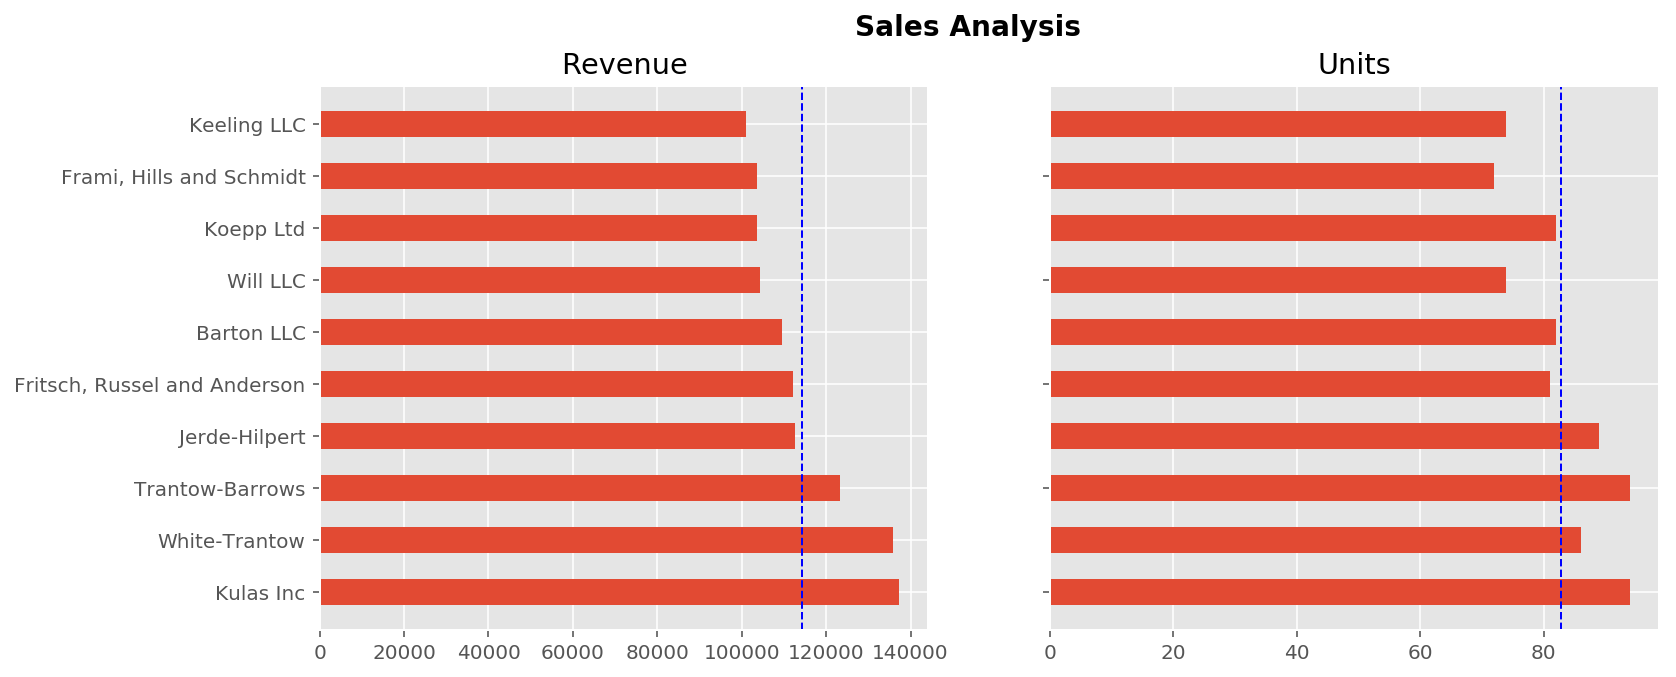

In [13]:
#设置画布大小
fig = plt.figure(figsize=(12,5))
# 加上图像标题, fontsize=14 字体大小, fontweight='bold' 加粗
fig.suptitle('Sales Analysis', fontsize=14, fontweight='bold')

# 添加第一个子图
ax1 = fig.add_subplot(121) 
plt.barh(np.arange(10), top10.Sales, height=0.5, tick_label=top10.Name)
plt.title('Revenue')

# 加入平均销售额，用一条垂直的虚线表示
revenue_average = top10.Sales.mean()
plt.axvline(x=revenue_average, color='b', linestyle='--', linewidth=1)

# 添加第二个子图
ax2 = fig.add_subplot(122)
plt.barh(np.arange(10), top10.Purchases, height=0.5)
plt.title('Units')
# 不显示y轴刻度
plt.yticks(visible=False)

# 加入平均交易个数，用一条垂直的虚线表示
purchases_average = top10.Purchases.mean()
plt.axvline(x=purchases_average, color='b', linestyle='--', linewidth=1)

plt.show()

### 其他图形

**饼图**

销售额 top10 公司中，销售总额占比的饼图

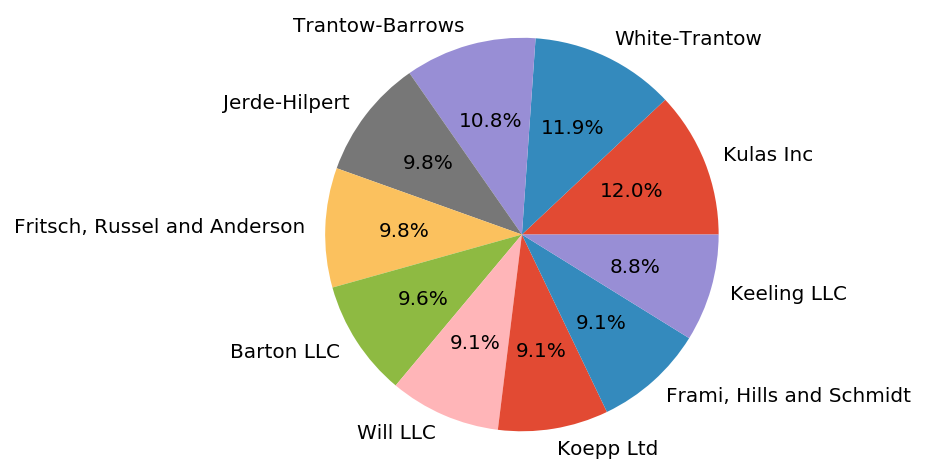

In [14]:
# pie绘制饼图，labels设置每个区域的标签名，autopct 显示所占比例
plt.pie(top10.Sales, labels=top10.Name, autopct='%1.1f%%')
# 调整坐标轴的比例
plt.axis('equal')
plt.show()

** 散点图**

销售额 top10 公司中，总的销售额和交易数量的关系

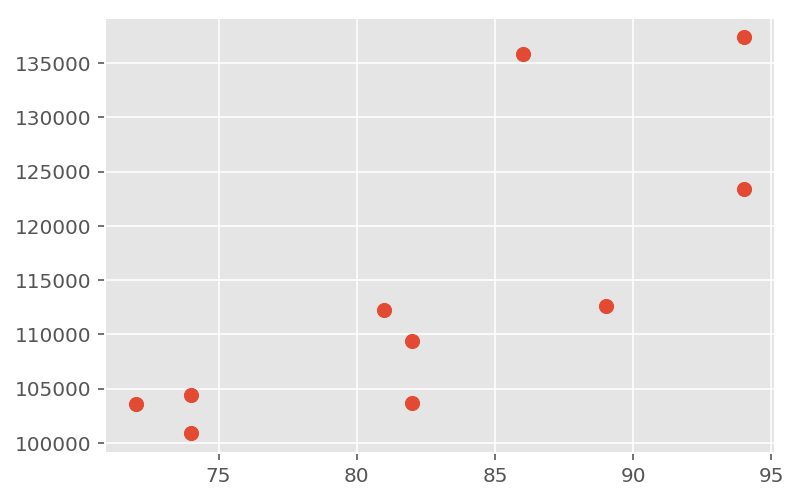

In [15]:
# scatter 绘制散点图，x,y设置x轴和y轴对应的数据，s设置点的大小
plt.scatter(x=top10.Purchases, y=top10.Sales, s=50)
plt.show()

** 直方图 **

对于所有的交易，单笔交易总价的分布情况

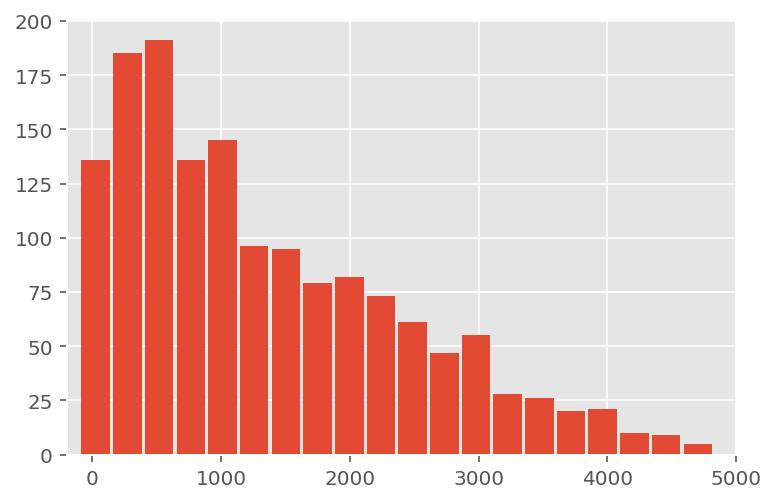

In [16]:
# hist绘制直方图，bins设置区间个数
plt.hist(df['ext price'], bins=20, rwidth=0.9)
# 设置x轴区间范围
plt.xlim(-200, 5000)
plt.show()

### 小结
* 通过上述例子我们可以看到matplotlib几乎可以控制一切想控制的细节
* 最好的学习方法是通过阅读不同的作图代码来丰富自己的工具箱
* 我们需要贯彻用以致学的思想来提高自己的画图技能，即需要什么样的图时去学习什么样的方法，因为画图选项纷繁复杂，没有必要记住所有选项。

## Python数据可视化模块—Seaborn
* matplotlib是python的主要绘图工具，但其自身的语法比较复杂
* Seaborn是基于matplotlib产生的一个模块，专攻于统计可视化
* 可以和pandas进行无缝链接，初学者使用Seaborn更容易上手
* Seaborn和matplotlib的关系类似于pandas和numpy的关系。

In [17]:
# 导入seaborn包， 简写成sns
import seaborn as sn

### 回顾鸢尾花的案例

In [18]:
iris = pd.read_csv('iris.txt')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**绘制花瓣长度和宽度关系的散点图，并用品种划分数据**

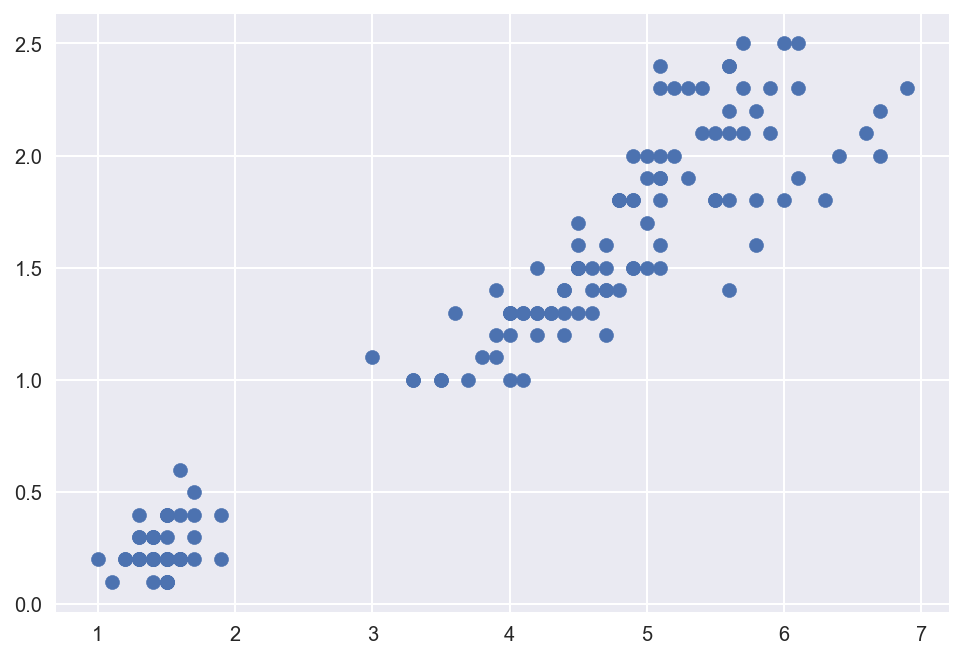

In [19]:
# 使用 matplotlib 中 scatter 函数做图
plt.scatter(iris.petal_length, iris.petal_width)

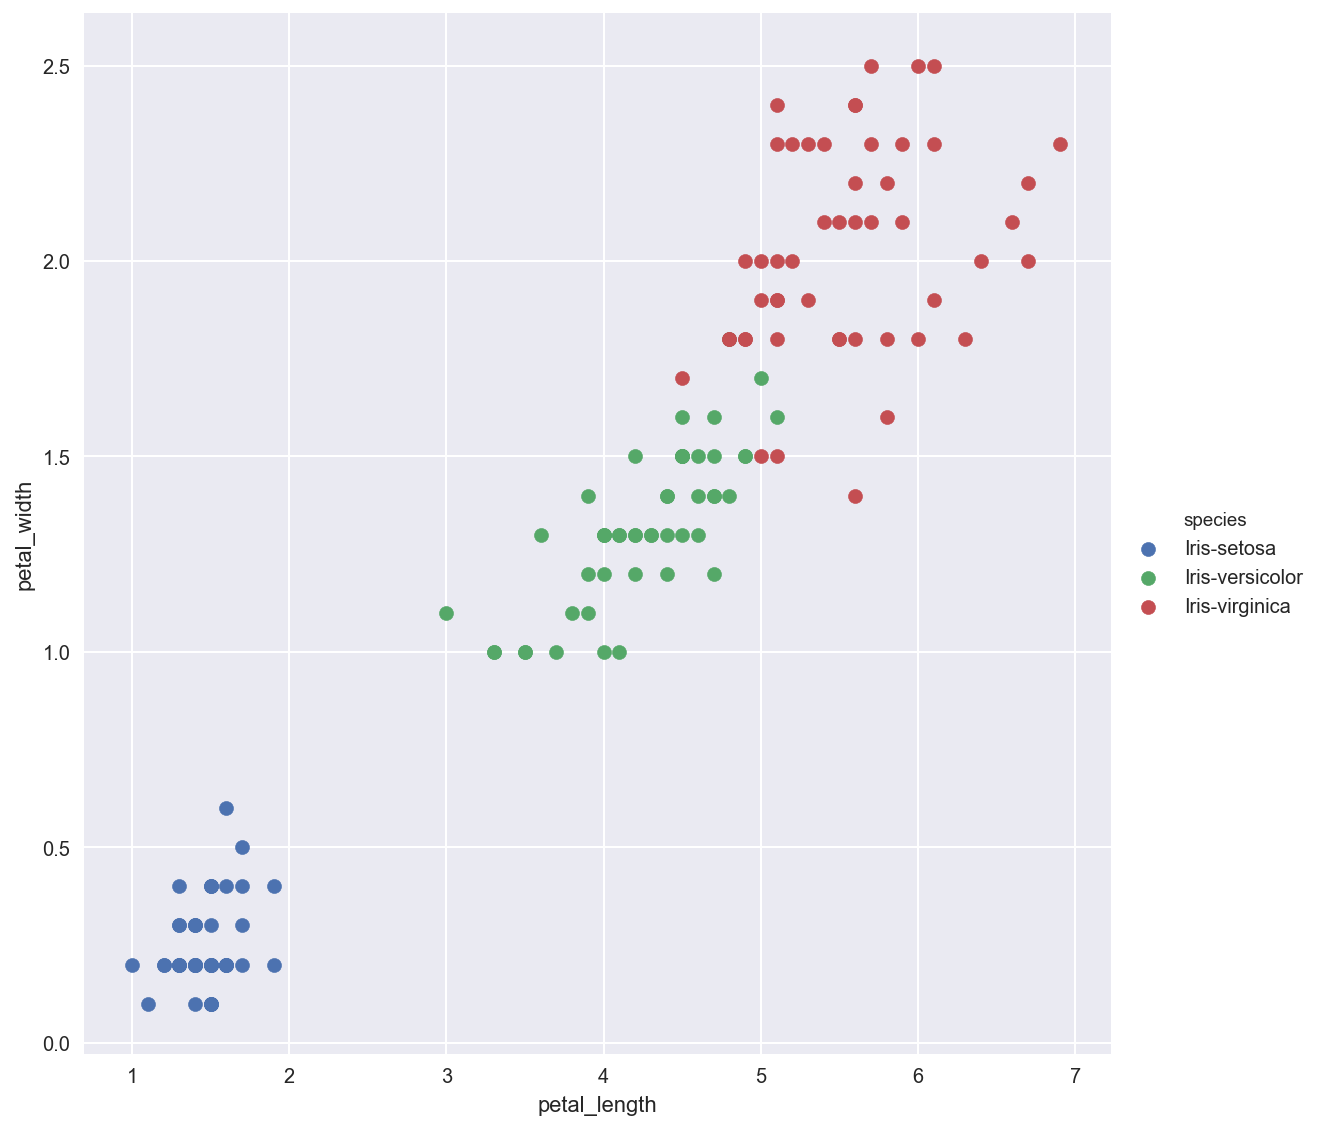

In [20]:
# 使用seaborn做图， 用品种划分数据
# FacetGrid对象是用来连接pandas DataFrame到一个有着特别结构的matplotlib图像
# 具体来说，FacetGrid是用来画一组固定的关系给定某个变量的某个值
# FacetGrid中的hue参数指明划分数据的变量，这里是species（品种）

sns.FacetGrid(iris, hue="species", size=8) \
   .map(plt.scatter, "petal_length", "petal_width").add_legend()

**根据品种划分的花萼宽度的箱线图**

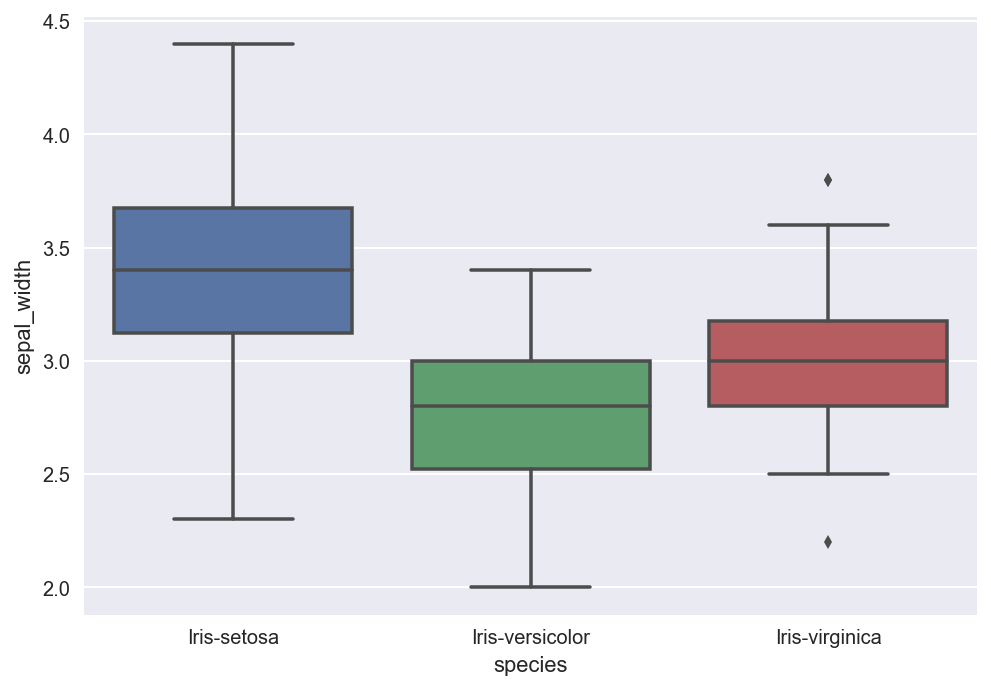

In [21]:
sns.boxplot(data=iris, x="species", y="sepal_width")

**多变量图**

用于快速观察各个变量的分布，及其之间的关系

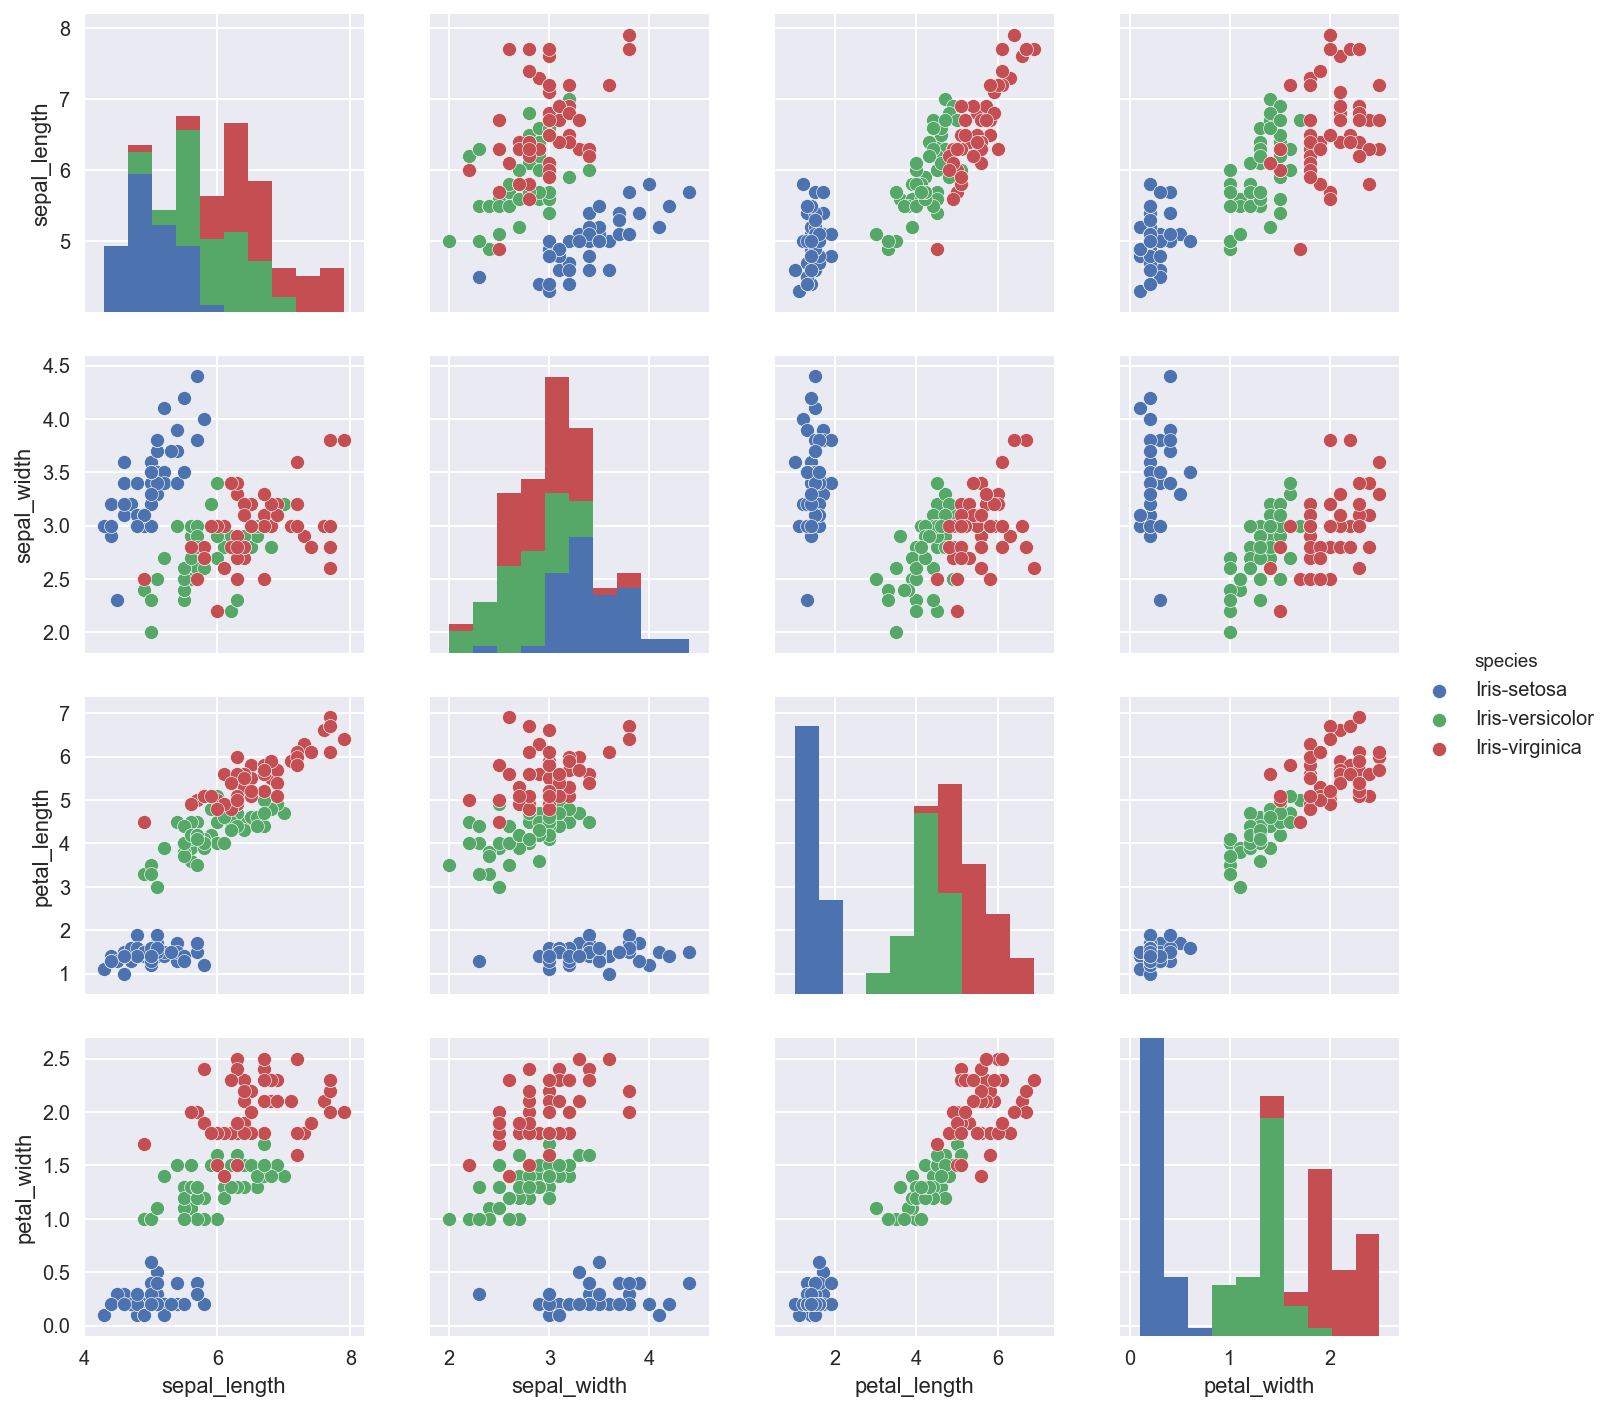

In [22]:
# 一行命令画出四个变量的配对关系
sns.pairplot(iris, hue="species")

## 作业7-2：
* 模仿上述例子，画出花萼宽度和长度的散点图，使用品种划分数据
* 模仿上述例子，画出花萼的长度的箱线图，使用品种划分数据

##  选做作业：波士顿房价数据的可视化


In [23]:
from sklearn import datasets
boston_dataset = datasets.load_boston()

In [24]:
X_full = boston_dataset.data #导入特征
Y = boston_dataset.target #导入目标： 房屋中间价 1000美元计价。

In [25]:
# 将数据转化为dataframe
boston = pd.DataFrame(X_full)
boston.columns = boston_dataset.feature_names
boston["PRICE"] = Y 
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


更多信息请查看 http://archive.ics.uci.edu/ml/datasets/Housing

** 变量名字解释:**
1. CRIM: per capita crime rate by town 犯罪率
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 后院面积大于25000平方英尺的比例
3. INDUS: proportion of non-retail business acres per town 
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 是否靠近查尔斯河
5. NOX: nitric oxides concentration (parts per 10 million) nitric oxides浓度
6. RM: average number of rooms per dwelling 
7. AGE: proportion of owner-occupied units built prior to 1940 
8. DIS: weighted distances to five Boston employment centres 
9. RAD: index of accessibility to radial highways 
10. TAX: full-value property-tax rate per \$10,000 
11. PTRATIO: pupil-teacher ratio by town 
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
13. LSTAT: % lower status of the population 下层经济阶层百分比
14. MEDV: Median value of owner-occupied homes in $1000's